# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

**The dataset represents 17 distinct marketing campaigns conducted by a Portuguese bank between May 2008 and November 2010, as documented in the Materials and Methods section of the associated research paper.**

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import time

#### Read the CSV file

In [40]:
bank_campaign_df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

#### Preview first 5 rows

In [41]:
bank_campaign_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### To verify the structure of the data and display the datatypes of each column

In [42]:
bank_campaign_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### Summary statistics for numerical columns

In [43]:
bank_campaign_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#### To display the conversion rate of the dataset

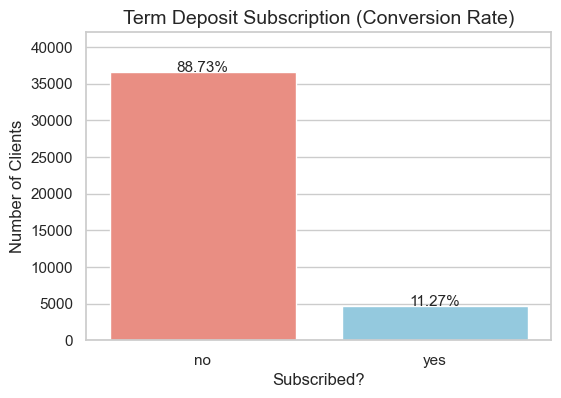

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Calculate counts
conversion_counts = bank_campaign_df['y'].value_counts()
total_contacts = conversion_counts.sum()

# Calculate percentages
conversion_percentages = (conversion_counts / total_contacts * 100).round(2)

# Set seaborn style
sns.set(style="whitegrid")
plt.figure(figsize=(6,4))

# Plot bars manually with colors to avoid the palette/hue warning
colors = ['salmon' if x == 'no' else 'skyblue' for x in conversion_counts.index]
bars = sns.barplot(x=conversion_counts.index,
                   y=conversion_counts.values,
                   palette=colors)  # now palette is per-bar, warning gone

# Add percentage labels
for bar, perc in zip(bars.patches, conversion_percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 50, f'{perc}%', ha='center', fontsize=11)

plt.title('Term Deposit Subscription (Conversion Rate)', fontsize=14)
plt.xlabel('Subscribed?')
plt.ylabel('Number of Clients')
plt.ylim(0, max(conversion_counts.values)*1.15)
plt.show()

### To see conversion rate across jobs

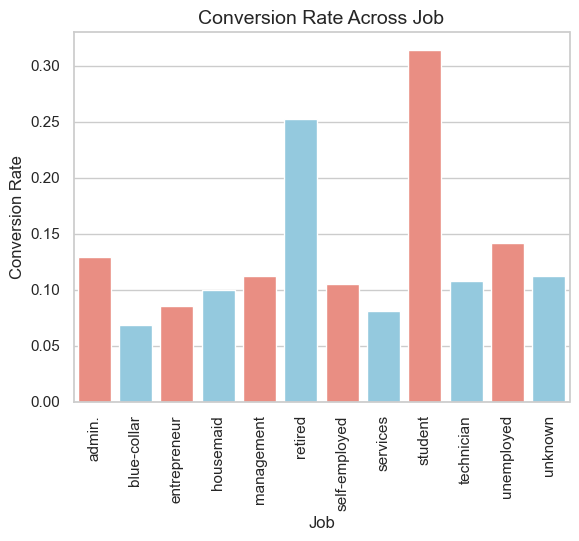

In [45]:
job_success = bank_campaign_df.groupby('job')['y'].value_counts(normalize=True).unstack()['yes']
job_success.sort_values(ascending=False)

bars = sns.barplot(x=job_success.index,
                   y=job_success.values,
                   palette=colors)  # now palette is per-bar, warning gone


plt.title('Conversion Rate Across Job', fontsize=14)
plt.xlabel('Job')
plt.xticks(rotation=90)  # rotate labels 45 degrees
plt.ylabel('Conversion Rate')
plt.ylim()
plt.show()

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:

# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')

# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



#### To check if there is a missing values

In [46]:
print("\nMissing Values:")
print(bank_campaign_df.isnull().sum())


Missing Values:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


#### Identify column types - automatically categorize the columns

In [47]:
numeric_cols = bank_campaign_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = bank_campaign_df.select_dtypes(include=['object', 'category']).columns.tolist()

#### Print results for inspection

- Numeric features (continuous numbers) - these requires scaling (StandardScaler)
- Categorical features (variables with more than 2 categories) - these require one-hot encoding
- Binary features (exactly  2 unique values) - already usable in modeling - do not one-hot encode

In [48]:
print("\nNumeric Columns:")
print(numeric_cols)

print("\nCategorical Columns:")
print(categorical_cols)


Numeric Columns:
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

Categorical Columns:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


#### To inspect unique values per column

In [49]:
for col in bank_campaign_df.columns:
    print(f"{col}: {bank_campaign_df[col].nunique()} unique values")

age: 78 unique values
job: 12 unique values
marital: 4 unique values
education: 8 unique values
default: 3 unique values
housing: 3 unique values
loan: 3 unique values
contact: 2 unique values
month: 10 unique values
day_of_week: 5 unique values
duration: 1544 unique values
campaign: 42 unique values
pdays: 27 unique values
previous: 8 unique values
poutcome: 3 unique values
emp.var.rate: 10 unique values
cons.price.idx: 26 unique values
cons.conf.idx: 26 unique values
euribor3m: 316 unique values
nr.employed: 11 unique values
y: 2 unique values


#### Feature Overview Table

In [50]:
feature_overview = pd.DataFrame({
    'Column': bank_campaign_df.columns,
    'DataType': bank_campaign_df.dtypes,
    'MissingValues': bank_campaign_df.isnull().sum(),
    'UniqueValues': [bank_campaign_df[col].nunique() for col in bank_campaign_df.columns]
})
print("\nFeature Overview:")
print(feature_overview)


Feature Overview:
                        Column DataType  MissingValues  UniqueValues
age                        age    int64              0            78
job                        job   object              0            12
marital                marital   object              0             4
education            education   object              0             8
default                default   object              0             3
housing                housing   object              0             3
loan                      loan   object              0             3
contact                contact   object              0             2
month                    month   object              0            10
day_of_week        day_of_week   object              0             5
duration              duration    int64              0          1544
campaign              campaign    int64              0            42
pdays                    pdays    int64              0            27
previous       

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

**The business objective of this task is to predict which customers are most likely to subscribe to a term deposit, enabling the bank to focus marketing efforts on high-potential clients, optimize campaign resources, and increase overall subscription rates.**

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

#### Separate features

In [51]:
X = bank_campaign_df.drop('y', axis=1)
y = bank_campaign_df['y']

#### Encode target feature separately

In [52]:
y = bank_campaign_df['y'].map({'yes': 1, 'no': 0})

#### Define preprocessor

In [53]:
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
    ],
    remainder='passthrough'
)

#### Fit and Transform

In [54]:
X_transformed = preprocessor.fit_transform(X)

#### Generate column names

In [55]:
# Get one-hot column names
ohe = preprocessor.named_transformers_['cat']
ohe_columns = ohe.get_feature_names_out(categorical_cols)

# Columns from numerical features
num_columns = numerical_cols

# Columns for DataFrame
all_columns = list(num_columns) + list(ohe_columns)
# PASSTHROUGH columns (binary) are automatically included in X_transformed

# Confirm column count matches transformed data
assert X_transformed.shape[1] == len(all_columns), \
    f"Shape mismatch: {X_transformed.shape[1]} vs {len(all_columns)}"

#### Convert to DataFrame

In [56]:
X_transformed_df = pd.DataFrame(X_transformed, columns=all_columns)
X_transformed_df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [57]:
# Check for missing values
print("Missing values:", X_transformed_df.isnull().sum().sum())

# Check data types
print(X_transformed_df.dtypes.value_counts())


Missing values: 0
float64    53
Name: count, dtype: int64


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed_df, y, test_size=0.2, random_state=42, stratify=y
)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

#### Check Class Distribution

In [59]:
import pandas as pd

# Count of each class
class_counts = y.value_counts()
class_distribution = y.value_counts(normalize=True)

print("Class counts:\n", class_counts)
print("\nClass distribution (proportion):\n", class_distribution)

Class counts:
 y
0    36548
1     4640
Name: count, dtype: int64

Class distribution (proportion):
 y
0    0.887346
1    0.112654
Name: proportion, dtype: float64


#### Create Baseline Predictions

In [60]:
# Majority class
majority_class = y.mode()[0]

# Predict the majority class for all samples
y_baseline = pd.Series(majority_class, index=y.index)


#### Evaluate Baseline Performance

In [61]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Accuracy
baseline_accuracy = accuracy_score(y, y_baseline)

# F1-score (for minority class, set pos_label=1)
baseline_f1 = f1_score(y, y_baseline, pos_label=1)

# ROC-AUC (probabilities: 0 for majority, 1 for minority)
baseline_roc_auc = roc_auc_score(y, y_baseline)

print("Baseline Performance (Majority Class):")
print(f"Accuracy: {baseline_accuracy:.4f}")
print(f"F1-score: {baseline_f1:.4f}")
print(f"ROC-AUC: {baseline_roc_auc:.4f}")


Baseline Performance (Majority Class):
Accuracy: 0.8873
F1-score: 0.0000
ROC-AUC: 0.5000


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [63]:
# Make predictions
y_pred = model.predict(X_test)

### Problem 9: Score the Model

What is the accuracy of your model?

In [64]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9161204175770818


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression      0.0790          0.9101         0.9161
1                  SVM      7.8862          0.9251         0.9125
2                  KNN      0.0013          0.9206         0.9022
3        Decision Tree      0.1492          1.0000         0.8948


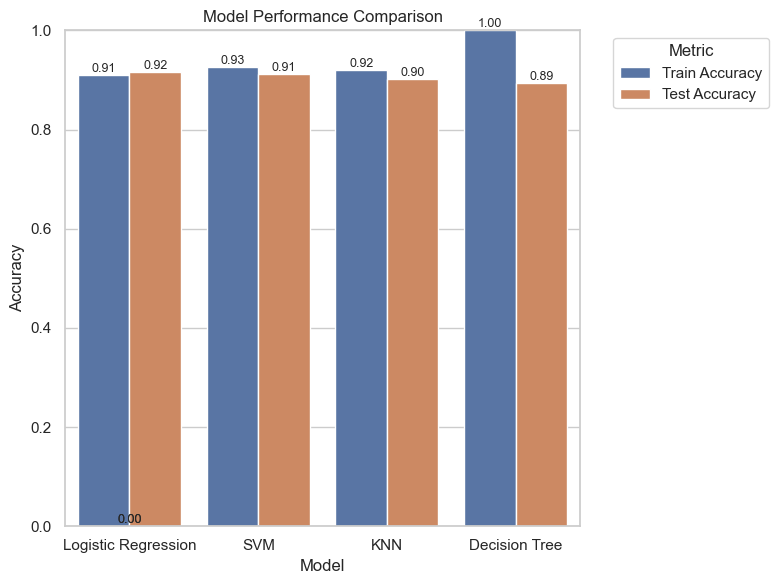

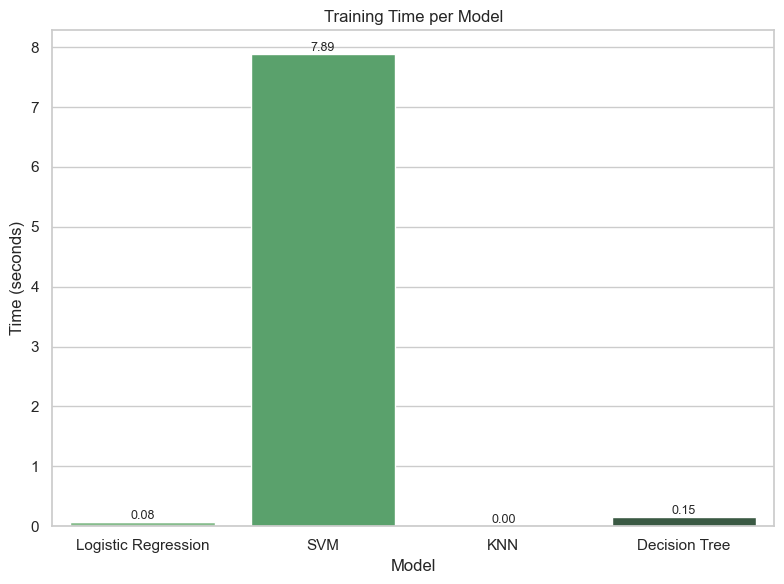

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC()
}

# Evaluate Models
results = []

for name, model in models.items():
    # Use scaled data for KNN and SVM
    if name in ["KNN", "SVM"]:
        X_tr, X_te = X_train_scaled, X_test_scaled
    else:
        X_tr, X_te = X_train, X_test

    start = time.time()
    model.fit(X_tr, y_train)
    end = time.time()

    train_acc = model.score(X_tr, y_train)
    test_acc = model.score(X_te, y_test)

    # Cross-validation 
    cv_results = cross_validate(model, X_tr, y_train, cv=5, scoring='accuracy')
    cv_acc = cv_results['test_score'].mean()

    results.append({
        "Model": name,
        "Train Time": round(end - start, 4),
        "Train Accuracy": round(train_acc, 4),
        "Test Accuracy": round(test_acc, 4),
    })

# Results DataFrame 
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Test Accuracy", ascending=False).reset_index(drop=True)
print(results_df)

# Plots
sns.set(style="whitegrid", font_scale=1)

# Accuracy Comparison 
plt.figure(figsize=(8, 6))
results_melted = results_df.melt(
    id_vars="Model",
    value_vars=["Train Accuracy", "Test Accuracy"], 
    var_name="Metric",
    value_name="Accuracy"
)

ax = sns.barplot(data=results_melted, x="Model", y="Accuracy", hue="Metric")
plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)

# Annotate bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9)

# Move legend outside
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Training Time Comparison
plt.figure(figsize=(8, 6))
ax2 = sns.barplot(data=results_df, x="Model", y="Train Time", palette="Greens_d")
plt.title("Training Time per Model")
plt.xlabel("Model")
plt.ylabel("Time (seconds)")

# Annotate bars
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [66]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from joblib import parallel_backend
import time
import warnings
import plotly.graph_objects as go

warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.preprocessing._encoders")

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Subset for hyperparameter tuning
X_train_sub, _, y_train_sub, _ = train_test_split(
    X_train, y_train, train_size=0.2, stratify=y_train, random_state=42
)

# Models & parameters
model_params = {
    "K-Nearest Neighbors": (
        KNeighborsClassifier(),
        {"model__n_neighbors": [3, 5]}
    ),
    "Logistic Regression": (
        LogisticRegression(max_iter=2000),
        {"model__C": [0.1, 1]}
    ),
    "Decision Tree": (
        DecisionTreeClassifier(),
        {"model__max_depth": [6, 10]}
    ),
    "SVC (RBF Kernel)": (
        SVC(kernel='rbf', probability=True, max_iter=8000),
        {"model__C": [0.1, 1], "model__gamma": ['scale', 0.01, 0.1]}
    )
}

results = []

# GridSearchCV loop
for name, (model, params) in model_params.items():
    print(f"🔍 Running GridSearchCV for {name}...")

    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])

    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=params,
        scoring="accuracy",
        cv=3,
        n_jobs=1,
        verbose=0
    )

    start_time = time.time()
    with parallel_backend("loky"):
        grid_search.fit(X_train_sub, y_train_sub)
    end_time = time.time()

    best_model = grid_search.best_estimator_

    train_acc = accuracy_score(y_train, best_model.predict(X_train))
    test_acc = accuracy_score(y_test, best_model.predict(X_test))

    results.append({
        "Model": name,
        "Train Time (s)": round(end_time - start_time, 2),
        "Train Accuracy": round(train_acc, 4),
        "Test Accuracy": round(test_acc, 4)
    })

# Results DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Test Accuracy", ascending=False).reset_index(drop=True)

print("\n=== Model Comparison ===")
print(results_df)


# Plotly Bar Chart — Accuracy
fig_accuracy = go.Figure()

fig_accuracy.add_trace(go.Bar(
    x=results_df["Model"],
    y=results_df["Train Accuracy"],
    name="Train Accuracy"
))

fig_accuracy.add_trace(go.Bar(
    x=results_df["Model"],
    y=results_df["Test Accuracy"],
    name="Test Accuracy"
))

fig_accuracy.update_layout(
    title="Model Performance: Train vs Test Accuracy",
    xaxis_title="Model",
    yaxis_title="Accuracy",
    barmode="group",
    width=900,
    height=500
)

fig_accuracy.show()


# Plotly Bar Chart — Training Time
fig_time = go.Figure()

fig_time.add_trace(go.Bar(
    x=results_df["Model"],
    y=results_df["Train Time (s)"],
    name="Train Time (seconds)"
))
                                                                      
fig_time.update_layout(
    title="Model Training Time Comparison",
    xaxis_title="Model",
    yaxis_title="Training Time (seconds)",
    width=900,
    height=500
)

fig_time.show()


🔍 Running GridSearchCV for K-Nearest Neighbors...
🔍 Running GridSearchCV for Logistic Regression...
🔍 Running GridSearchCV for Decision Tree...
🔍 Running GridSearchCV for SVC (RBF Kernel)...

=== Model Comparison ===
                 Model  Train Time (s)  Train Accuracy  Test Accuracy
0  Logistic Regression            1.73          0.9088         0.9124
1        Decision Tree            0.33          0.9103         0.9121
2     SVC (RBF Kernel)           18.29          0.9036         0.9065
3  K-Nearest Neighbors            0.36          0.9044         0.9053


### Bank Campaign Analysis - Classification Modeling Report

#### Summary
---
This analysis evaluates the effectiveness of the bank’s telemarketing campaign using classification modeling. The goal is to determine which clients are most likely to subscribe to a term deposit, enabling the organization to optimize targeting efforts and campaign resources.

Four classification models were trained and compared based on:
- Training time
- Training accuracy
- Testing accuracy

The model with the best combination of high test accuracy and reasonable training time is recommended for future use in campaign targeting.

#### Objective of the study
---
The bank conducts direct telemarketing campaigns to promote term deposits. However, these campaigns require extensive time and labour, and conversion rates remain low due to the untargeted nature of the outreach.

Objective:
1. Train and evaluate four classification models to predict whether a client will subscribe to a term deposit.
2.  Compare model performance using training time, training accuracy, and testing accuracy.
3.	Identify key insights that can help improve future campaign efficiency and conversion rates.

#### Dataset
---
Dataset: Bank Marketing Campaign Dataset <br>
Source: UCI Machine Learning Repository <br>
Link: [Bank Marketing - UCI Machine Learning Repository ](https://archive.ics.uci.edu/ml/datasets/bank+marketing)

#### Data Preparation Summary
---
Preparation steps completed prior to modeling:
- Converted target column (y) to binary (1 = subscribed, 0 = not subscribed).
- One-hot encoded categorical variables.
- Scaled numerical features when required (e.g., for KNN or SVM).
- Split into training and testing datasets (e.g., 80% train / 20% test).

These steps ensure consistent formatting and fairness across trained models.

#### Classification Modeling
---
**Models Trained**<br>
The following four classifiers were trained:
1. Logistic Regression
2. K-Nearest Neighbors (KNN)
3. Decision Tree Classifier
4. Support Vector Machine (SVM)

Each model was trained using identical train-test splits to ensure fair comparison.

**Performance Evaluation**<br>
Performance was assessed using:
- Training Time (seconds) — efficiency
- Training Accuracy — how well the model fits known data
- Testing Accuracy — generalization performance (ability to predict new clients)

#### Insights
---
1. **SVM (RBF Kernel):**
- Demonstrated the longest training time, significantly higher than the other models.
- Despite the heavy computational cost, it did not achieve the highest test accuracy, indicating that the added complexity and non-linear kernel did not provide sufficient predictive benefit for this dataset.
- This inefficiency is particularly relevant when scaling to larger datasets or when retraining models frequently.
  
2. **K-Nearest Neighbors (KNN) and Decision Tree:**
- Had moderate training times and performed adequately, but did not surpass Logistic Regression in test accuracy.

3. **Logistic Regression:**
- Combined fast training with high test accuracy, making it the most reliable model in terms of balancing computational efficiency and predictive performance.
- Its simplicity ensures easy deployment and interpretability for business stakeholders, allowing decisions to be communicated clearly and acted upon confidently.

#### Recommendation
---
Considering both effiency and performance, logistic regression is the recommended model for this bank campaign dataset